In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [176]:
data = pd.read_table("profile_semantic_trafo_final.txt", delim_whitespace= True)


def dynamic_heatmap(path, df, X, Y, shift_over, n, interval, values=None, aggfunc=np.sum, **kwargs):
    """
    ~~~ ARGS ~~~
    path:        str           folder to store images in
    df:          pd.DataFrame  data frame
    X:           str           Name of column for X-axis
    Y:           str           Name of column for Y-axis
    shift_over   str           Name of column to apply shift over
    n            int           Number of shifts
    interval     float         Interval of shift column at each iteration
    values       str           Name of column to summarize
    aggfunc      function      Function to summarize values column
    **kwargs     -             Additional arguments to be passed into sns.heatmap()
    """
    # CREATE DIR FOR GRAPHS
    if not os.path.exists(path):
        os.makedirs(path)
    
    # IF NO VALUE COLUMN IS SET JUST USE FREQUENCIES
    if values is None:
        df["#@frequency_column"] = 1
        values = "#@frequency_column"
    
    # PROPERTIES FOR SHIFT
    min_of_shift = min(df[shift_over])
    step_of_shift = (max(df[shift_over]) - min(df[shift_over]) - interval) / (n-1)
    
    for i in range(0, n):
        # CREATES SUBSET OF DATA FOR EVERY STEP
        df_subset = df.loc[(df[shift_over] >= min_of_shift + step_of_shift*i) &
                           (df[shift_over] <= min_of_shift + step_of_shift*i+interval)]
        
        # CALCULATES TABLE AND PLOTS IT AS HEATMAP
        table = pd.crosstab(df_subset[X], df_subset[Y], values=df_subset[values], aggfunc=aggfunc)
        plt.clf() # Clear window
        plot = sns.heatmap(table, **kwargs)
        
        # SAVES FIGURE IN DIR
        plot.get_figure().savefig(path + str(time.time()) + ".png")

def wipe(path):
    folder = os.listdir(path)

    for item in folder:
        if item.endswith(".png"):
            os.remove(os.path.join(path, item))

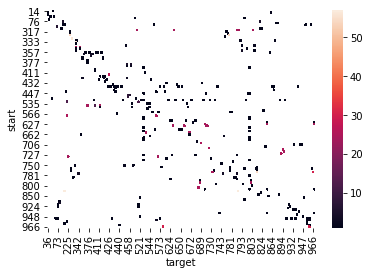

In [177]:
dynamic_heatmap("graphs/", data, "start", "target", "time", 30, 100)

In [171]:
wipe("graphs")

In [150]:
max(data["time"])

1231